## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

#### [Dataset Description](https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description)

#### Infections over Time

In [2]:
infections_prov_time = pd.read_csv('../../data/TimeProvince.csv')

In [3]:
infections_prov_time.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [4]:
infections_prov_time.describe()

,time,confirmed,released,deceased
count,1564.000000,1564.000000,1564.000000,1564.000000
mean,7.304348,290.842711,126.927749,4.335038
std,7.972246,1112.384174,642.360989,19.190269
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,2.000000,0.000000
75%,16.000000,72.250000,21.000000,0.000000
max,16.000000,6833.000000,5769.000000,163.000000


#### Weather

In [5]:
weather = pd.read_csv('../../data/Weather.csv')

In [6]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [7]:
weather.describe()

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,25135.000000,25120.000000,25130.000000,25132.000000,25135.000000,25126.000000,25106.000000,25115.000000
mean,32124.646907,13.615736,9.429001,18.524523,3.273738,5.104581,195.863937,65.548636
std,20313.519484,9.615995,10.001830,9.667336,12.642853,2.021354,106.903346,17.239956
min,10000.000000,-14.800000,-19.200000,-11.900000,0.000000,1.000000,20.000000,10.400000
25%,13500.000000,5.700000,1.100000,10.600000,0.000000,3.800000,90.000000,53.500000
50%,20000.000000,14.100000,9.400000,19.300000,0.000000,4.700000,200.000000,66.600000
75%,50500.000000,21.900000,18.100000,26.600000,0.200000,6.000000,290.000000,78.600000
max,70000.000000,33.900000,30.300000,40.000000,310.000000,29.400000,360.000000,100.000000


#### Combining datasets

In [8]:
#Summarizing infections over time to the day unit
infections_prov_time_clean = infections_prov_time.rename(index=str, columns={'confirmed':'accum_confirmed',
                                                        'released':'accum_released',
                                                        'deceased':'accum_deceased'}) \
                                                    .groupby(['province','date']) \
                                                    .agg({'accum_confirmed':sum,
                                                          'accum_released':sum,
                                                          'accum_deceased':sum}).reset_index()

infections_prov_time_clean['new_confirmed'] = infections_prov_time_clean.groupby(['province']).accum_confirmed.transform(lambda x : x - x.shift(1)).fillna(0)
infections_prov_time_clean['new_released'] = infections_prov_time_clean.groupby(['province']).accum_released.transform(lambda x : x - x.shift(1)).fillna(0)
infections_prov_time_clean['new_deceased'] = infections_prov_time_clean.groupby(['province']).accum_deceased.transform(lambda x : x - x.shift(1)).fillna(0)

infections_prov_time_clean

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased
0,Busan,2020-01-20,0,0,0,0.0,0.0,0.0
1,Busan,2020-01-21,0,0,0,0.0,0.0,0.0
2,Busan,2020-01-22,0,0,0,0.0,0.0,0.0
3,Busan,2020-01-23,0,0,0,0.0,0.0,0.0
4,Busan,2020-01-24,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1559,Ulsan,2020-04-16,42,34,1,0.0,1.0,0.0
1560,Ulsan,2020-04-17,42,34,1,0.0,0.0,0.0
1561,Ulsan,2020-04-18,42,34,1,0.0,0.0,0.0
1562,Ulsan,2020-04-19,42,34,1,0.0,0.0,0.0


In [9]:
day_one_per_province = infections_prov_time_clean[infections_prov_time_clean['accum_confirmed'] > 0] \
                                                  .sort_values(['province','date']) \
                                                  .groupby(['province']) \
                                                  .head(1) \
                                                  .reset_index() \
                                                  .filter(['province','date']) \
                                                  .assign(days_since_day1 = 1)

day_one_per_province

,province,date,days_since_day1
0,Busan,2020-02-20,1
1,Chungcheongbuk-do,2020-02-21,1
2,Chungcheongnam-do,2020-02-21,1
3,Daegu,2020-02-18,1
4,Daejeon,2020-02-22,1
5,Gangwon-do,2020-02-22,1
6,Gwangju,2020-02-04,1
7,Gyeonggi-do,2020-01-24,1
8,Gyeongsangbuk-do,2020-02-19,1
9,Gyeongsangnam-do,2020-02-19,1


In [10]:
infections_since_day1 = pd.merge(infections_prov_time_clean,day_one_per_province, how='left')
infections_since_day1['after_day1'] = infections_since_day1.groupby(['province']).days_since_day1.transform(lambda x : x.ffill()).fillna(0)
infections_since_day1 = infections_since_day1[infections_since_day1['after_day1'] == 1]
infections_since_day1['days_since_day1'] = infections_since_day1.groupby(['province']).after_day1.transform(lambda x : x.cumsum()).fillna(0)
infections_since_day1 = infections_since_day1.drop(columns=['after_day1'], axis=1)
infections_since_day1

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
31,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0
32,Busan,2020-02-21,8,0,0,0.0,0.0,0.0,2.0
33,Busan,2020-02-22,11,0,0,3.0,0.0,0.0,3.0
34,Busan,2020-02-23,19,0,0,8.0,0.0,0.0,4.0
35,Busan,2020-02-24,34,0,0,15.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
1559,Ulsan,2020-04-16,42,34,1,0.0,1.0,0.0,55.0
1560,Ulsan,2020-04-17,42,34,1,0.0,0.0,0.0,56.0
1561,Ulsan,2020-04-18,42,34,1,0.0,0.0,0.0,57.0
1562,Ulsan,2020-04-19,42,34,1,0.0,0.0,0.0,58.0


In [11]:
infections_since_day1.sort_values(['days_since_day1','province'])

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
31,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0
124,Chungcheongbuk-do,2020-02-21,1,0,0,1.0,0.0,0.0,1.0
216,Chungcheongnam-do,2020-02-21,1,0,0,1.0,0.0,0.0,1.0
305,Daegu,2020-02-18,1,0,0,1.0,0.0,0.0,1.0
401,Daejeon,2020-02-22,2,0,0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1007,Incheon,2020-04-16,88,51,0,0.0,3.0,0.0,88.0
1008,Incheon,2020-04-17,89,51,0,1.0,0.0,0.0,89.0
1009,Incheon,2020-04-18,90,55,0,1.0,4.0,0.0,90.0
1010,Incheon,2020-04-19,91,55,0,1.0,0.0,0.0,91.0


In [12]:
total_per_province = infections_since_day1.sort_values(['province','date']).groupby('province').tail(1).reset_index()
total_per_province = total_per_province[total_per_province['accum_confirmed'] >= 100]
total_per_province

,index,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
0,91,Busan,2020-04-20,132,115,3,2.0,0.0,0.0,61.0
2,275,Chungcheongnam-do,2020-04-20,141,122,0,0.0,0.0,0.0,60.0
3,367,Daegu,2020-04-20,6833,5769,163,1.0,26.0,2.0,63.0
7,735,Gyeonggi-do,2020-04-20,656,387,14,2.0,17.0,0.0,88.0
8,827,Gyeongsangbuk-do,2020-04-20,1361,1064,51,2.0,7.0,0.0,62.0
9,919,Gyeongsangnam-do,2020-04-20,116,87,0,0.0,2.0,0.0,62.0
15,1471,Seoul,2020-04-20,624,304,2,0.0,16.0,0.0,85.0


In [13]:
infections_since_day1[infections_since_day1.province.isin(total_per_province['province'])]

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1
31,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0
32,Busan,2020-02-21,8,0,0,0.0,0.0,0.0,2.0
33,Busan,2020-02-22,11,0,0,3.0,0.0,0.0,3.0
34,Busan,2020-02-23,19,0,0,8.0,0.0,0.0,4.0
35,Busan,2020-02-24,34,0,0,15.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
1467,Seoul,2020-04-16,619,250,2,2.0,11.0,0.0,81.0
1468,Seoul,2020-04-17,621,268,2,2.0,18.0,0.0,82.0
1469,Seoul,2020-04-18,622,274,2,1.0,6.0,0.0,83.0
1470,Seoul,2020-04-19,624,288,2,2.0,14.0,0.0,84.0


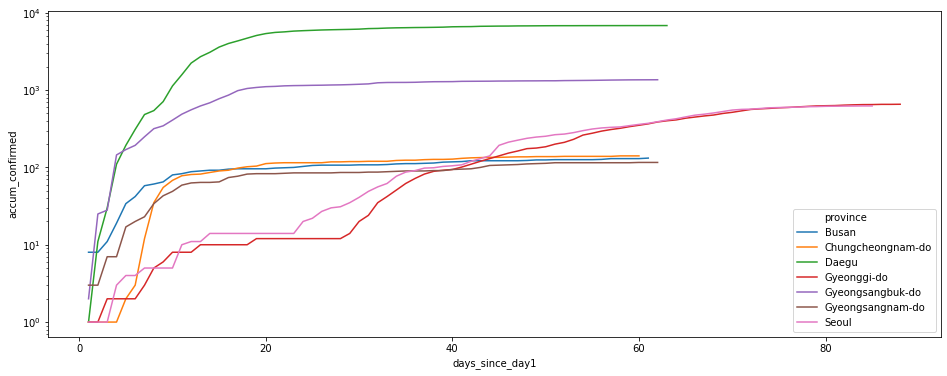

In [14]:
plt.figure(figsize=(16, 6))
p = sns.lineplot(x="days_since_day1", y="accum_confirmed", hue="province", data=infections_since_day1[infections_since_day1.province.isin(total_per_province['province'])]);
p.set_yscale("log")

In [15]:
data = {
    'province': ['Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
    'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Busan', 'Daegu', 'Daejeon', 'Gwangju', 'Incheon', 'Ulsan', 'Seoul', 'Jeju-do', 'Sejong'],
    'population': [12479061, 1518040, 1589377, 2107802, 1834114, 1799044, 2680294, 3334524, 3448737, 2466052, 1538394, 1502881, 2890451, 1166615, 9904312, 605619, 204088],
    'area': [10183.5, 16827.1, 7407.3, 8226.1, 8069.1, 12318.8, 19031.4, 10539.6, 769.6, 883.6, 539.3, 501.2, 1062.6, 1060.8, 605.2, 1849.1, 464.9]
}

provinces = pd.DataFrame(data = data, columns = ['province', 'population', 'area'])
provinces['pop_density'] = provinces['population'] / provinces['area']

In [16]:
provinces

,province,population,area,pop_density
0,Gyeonggi-do,12479061,10183.5,1225.419649
1,Gangwon-do,1518040,16827.1,90.214000
2,Chungcheongbuk-do,1589377,7407.3,214.569006
3,Chungcheongnam-do,2107802,8226.1,256.233452
4,Jeollabuk-do,1834114,8069.1,227.300938
5,Jeollanam-do,1799044,12318.8,146.040523
6,Gyeongsangbuk-do,2680294,19031.4,140.835356
7,Gyeongsangnam-do,3334524,10539.6,316.380508
8,Busan,3448737,769.6,4481.207121
9,Daegu,2466052,883.6,2790.914441


In [17]:
pd.merge(infections_since_day1.province.value_counts().reset_index(name='count'), provinces, left_on=['index'], right_on=['province'])

,index,count,province,population,area,pop_density
0,Incheon,92,Incheon,2890451,1062.6,2720.168455
1,Gyeonggi-do,88,Gyeonggi-do,12479061,10183.5,1225.419649
2,Seoul,85,Seoul,9904312,605.2,16365.353602
3,Jeollabuk-do,81,Jeollabuk-do,1834114,8069.1,227.300938
4,Gwangju,77,Gwangju,1502881,501.2,2998.565443
5,Daegu,63,Daegu,2466052,883.6,2790.914441
6,Gyeongsangbuk-do,62,Gyeongsangbuk-do,2680294,19031.4,140.835356
7,Gyeongsangnam-do,62,Gyeongsangnam-do,3334524,10539.6,316.380508
8,Busan,61,Busan,3448737,769.6,4481.207121
9,Jeju-do,60,Jeju-do,605619,1849.1,327.520956


In [18]:
infections_since_day1_full = pd.merge(infections_since_day1, provinces, how='left')
infections_since_day1_full['accum_confirmed_perc_total_pop'] = infections_since_day1_full['accum_confirmed'] / infections_since_day1_full['population']
infections_since_day1_full

,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1,population,area,pop_density,accum_confirmed_perc_total_pop
0,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0,3448737,769.6,4481.207121,0.000002
1,Busan,2020-02-21,8,0,0,0.0,0.0,0.0,2.0,3448737,769.6,4481.207121,0.000002
2,Busan,2020-02-22,11,0,0,3.0,0.0,0.0,3.0,3448737,769.6,4481.207121,0.000003
3,Busan,2020-02-23,19,0,0,8.0,0.0,0.0,4.0,3448737,769.6,4481.207121,0.000006
4,Busan,2020-02-24,34,0,0,15.0,0.0,0.0,5.0,3448737,769.6,4481.207121,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Ulsan,2020-04-16,42,34,1,0.0,1.0,0.0,55.0,1166615,1060.8,1099.750189,0.000036
1142,Ulsan,2020-04-17,42,34,1,0.0,0.0,0.0,56.0,1166615,1060.8,1099.750189,0.000036
1143,Ulsan,2020-04-18,42,34,1,0.0,0.0,0.0,57.0,1166615,1060.8,1099.750189,0.000036
1144,Ulsan,2020-04-19,42,34,1,0.0,0.0,0.0,58.0,1166615,1060.8,1099.750189,0.000036


In [19]:
total_per_province_perc = infections_since_day1_full.sort_values(['province','date']).groupby('province').tail(1).reset_index()
total_per_province_perc = total_per_province_perc[total_per_province_perc['accum_confirmed_perc_total_pop'] >= 0.00005]
total_per_province_perc.sort_values(['accum_confirmed_perc_total_pop'], ascending=False)

,index,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1,population,area,pop_density,accum_confirmed_perc_total_pop
3,243,Daegu,2020-04-20,6833,5769,163,1.0,26.0,2.0,63.0,2466052,883.6,2790.914441,0.002771
8,588,Gyeongsangbuk-do,2020-04-20,1361,1064,51,2.0,7.0,0.0,62.0,2680294,19031.4,140.835356,0.000508
14,1001,Sejong,2020-04-20,46,29,0,0.0,0.0,0.0,59.0,204088,464.9,438.993332,0.000225
2,180,Chungcheongnam-do,2020-04-20,141,122,0,0.0,0.0,0.0,60.0,2107802,8226.1,256.233452,0.000067
15,1086,Seoul,2020-04-20,624,304,2,0.0,16.0,0.0,85.0,9904312,605.2,16365.353602,0.000063
7,526,Gyeonggi-do,2020-04-20,656,387,14,2.0,17.0,0.0,88.0,12479061,10183.5,1225.419649,0.000053


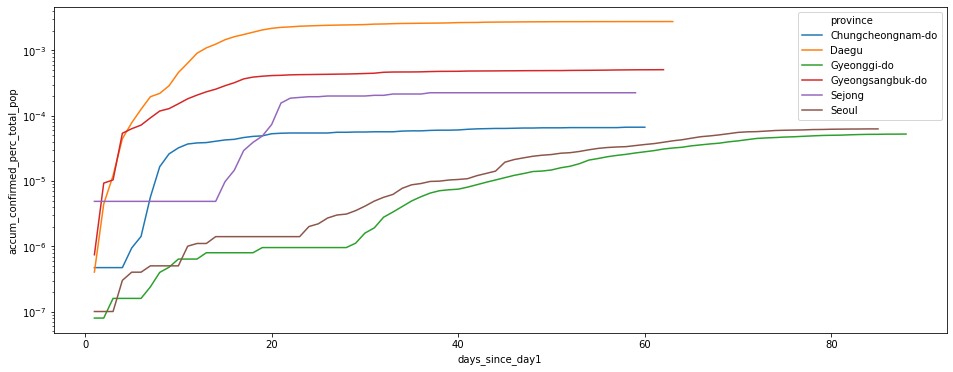

In [20]:
plt.figure(figsize=(16, 6))
p = sns.lineplot(x="days_since_day1", y="accum_confirmed_perc_total_pop", hue="province", data=infections_since_day1_full[infections_since_day1_full.province.isin(total_per_province_perc['province'])]);
p.set_yscale("log")

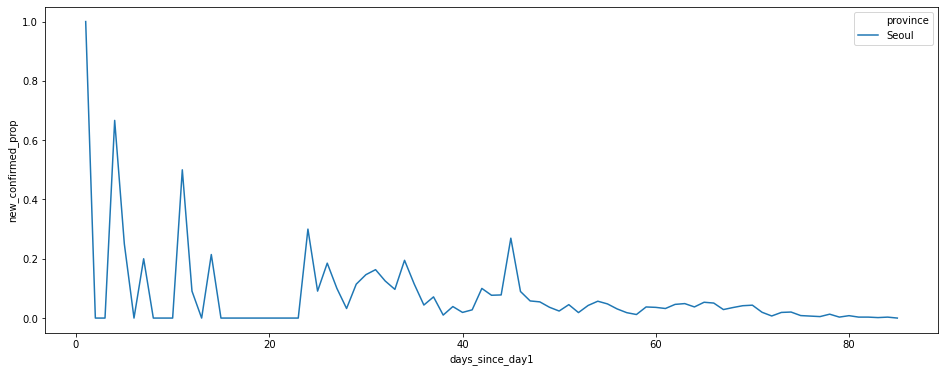

In [21]:
infections_since_day1_full['new_confirmed_prop'] = infections_since_day1_full['new_confirmed']/infections_since_day1_full['accum_confirmed']
plt.figure(figsize=(16, 6))
p = sns.lineplot(x="days_since_day1", y="new_confirmed_prop", hue="province", data=infections_since_day1_full[infections_since_day1_full.province.isin(['Seoul'])]);

In [22]:
infections_since_day1_full.shape

(1146, 14)

In [23]:
infections_weather_over_time = pd.merge(infections_since_day1_full,weather, on=['province','date'])
print(infections_weather_over_time.shape)
infections_weather_over_time

(1050, 22)


,province,date,accum_confirmed,accum_released,accum_deceased,new_confirmed,new_released,new_deceased,days_since_day1,population,...,accum_confirmed_perc_total_pop,new_confirmed_prop,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,Busan,2020-02-20,8,0,0,8.0,0.0,0.0,1.0,3448737,...,0.000002,1.000000,11000,9.3,4.6,14.7,0.0,4.7,90.0,45.9
1,Busan,2020-02-21,8,0,0,0.0,0.0,0.0,2.0,3448737,...,0.000002,0.000000,11000,11.0,5.5,16.0,4.1,5.2,50.0,63.3
2,Busan,2020-02-22,11,0,0,3.0,0.0,0.0,3.0,3448737,...,0.000003,0.272727,11000,9.5,5.1,12.9,0.7,14.2,270.0,44.0
3,Busan,2020-02-23,19,0,0,8.0,0.0,0.0,4.0,3448737,...,0.000006,0.421053,11000,6.0,1.1,11.7,0.0,7.4,270.0,40.5
4,Busan,2020-02-24,34,0,0,15.0,0.0,0.0,5.0,3448737,...,0.000010,0.441176,11000,10.8,5.5,15.7,0.0,7.6,230.0,46.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Ulsan,2020-04-15,42,33,1,0.0,0.0,0.0,54.0,1166615,...,0.000036,0.000000,16000,14.8,8.8,20.9,0.0,3.4,340.0,41.6
1046,Ulsan,2020-04-16,42,34,1,0.0,1.0,0.0,55.0,1166615,...,0.000036,0.000000,16000,12.0,10.4,14.9,0.0,5.0,70.0,69.6
1047,Ulsan,2020-04-17,42,34,1,0.0,0.0,0.0,56.0,1166615,...,0.000036,0.000000,16000,11.4,9.4,12.6,26.4,2.8,320.0,92.3
1048,Ulsan,2020-04-18,42,34,1,0.0,0.0,0.0,57.0,1166615,...,0.000036,0.000000,16000,13.2,9.0,18.5,0.1,4.6,320.0,77.6


#### New infections per day

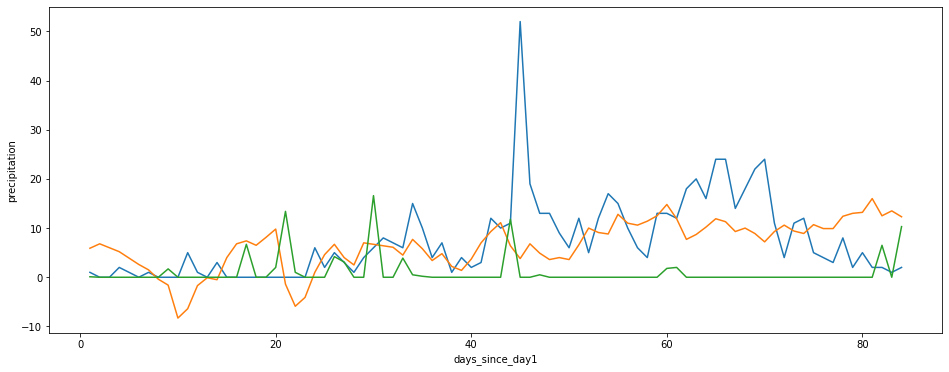

In [24]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="days_since_day1", y="new_confirmed", data=infections_weather_over_time[infections_weather_over_time['province'] == 'Seoul'])
sns.lineplot(x="days_since_day1", y="avg_temp", data=infections_weather_over_time[infections_weather_over_time['province'] == 'Seoul'])
sns.lineplot(x="days_since_day1", y="precipitation", data=infections_weather_over_time[infections_weather_over_time['province'] == 'Seoul'])